In [5]:
!pip install modal-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 1.8 MB/s eta 0:00:00 0:00:01


In [6]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.8 MB/s eta 0:00:0000:01:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer,

In [2]:
!pip install modAL

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 924.9 kB/s eta 0:00:00:--:--
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 kB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.8 MB/s eta 0:00:00
  Created wheel for grpclib: filename=grpclib-0.4.7-py3-none-any.whl size=76220 sha256=ca5a1b3654b8343f086aa2fb9d16c7bd2b01b00304b6c0753d19007c8a1c9666
  Stored in directory: /root/.cache/pip/wheels/05/c0/1c/3d807409d0c67efeab2949832ba409205b1b6fe03f739ae4c1
Successfully built grpclib


In [3]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling, margin_sampling, entropy_sampling, classifier_uncertainty
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [4]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
len(X_train)

60000

CNN model

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical

def create_model():
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Second convolutional block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    # Flatten the output for the fully connected layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Print the model summary
    model.summary()
    return model

In [7]:
# Use predict instead of predict_proba
def predict_proba(self, X, **predict_proba_kwargs):
    return self.estimator.predict(X, **predict_proba_kwargs)
ActiveLearner.predict_proba = predict_proba

# ***Random Sampling:***

prepare data

In [8]:
#labeled data
initial_idx = slice(2000)
X_initial_1 = X_train[initial_idx]
y_initial_1 = y_train[initial_idx]


#unlabeled data
X_pool_1 = np.delete(X_train, initial_idx, axis=0)
y_pool_1 = np.delete(y_train, initial_idx, axis=0)

In [9]:
def random_sampling(classifier, X_pool):
    n_samples = len(X_pool)
    query_indices = np.random.choice(range(n_samples), size=1000, replace=False)
    return query_indices, X_pool[query_indices]

In [10]:
learner = ActiveLearner(
    estimator=create_model(),
    query_strategy = random_sampling,
    X_training=X_initial_1,
    y_training=y_initial_1
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,170,602 (8.28 MB)

 Trainable params: 2,169,194 (8.27 MB)

 Non-trainable params: 1,408 (5.50 KB)

I0000 00:00:1714626142.376309     494 service.cc:145] XLA service 0x7c6c40005c20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714626142.376347     494 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1714626142.376351     494 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


30/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4852 - loss: 2.0290

I0000 00:00:1714626150.056293     494 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.5700 - loss: 1.6653


94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.7716 - loss: 0.7064
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8014 - loss: 0.5925
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8233 - loss: 0.4968
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8519 - loss: 0.4453
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8764 - loss: 0.3661
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8628 - loss: 0.3694
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8831 - loss: 0.3206
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8890 - loss: 0.3131
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 

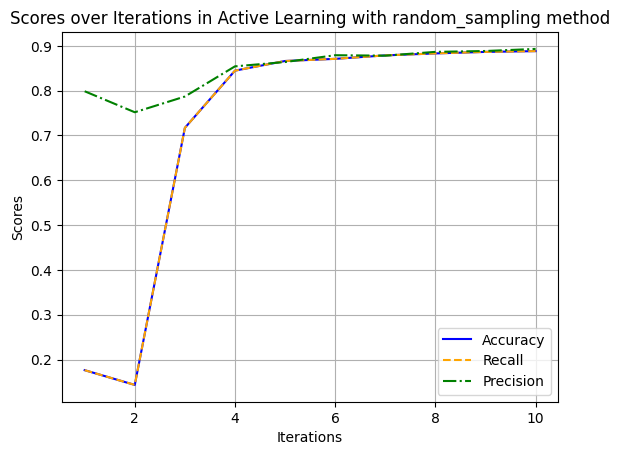

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

n_queries = 10
accuracies = [] 
recalls  = []
precisions = []
# Active learning loop
for _ in range(n_queries):
    query_idx, query_instance = learner.query(X_pool_1)
    X_query, y_query = X_pool_1[query_idx], y_pool_1[query_idx]

    
    learner.teach(X=X_query, y=y_query)
    
    X_pool_1 = np.delete(X_pool_1, query_idx, axis=0)
    y_pool_1 = np.delete(y_pool_1, query_idx, axis=0)
    print(len(X_query))
    y_pred = learner.predict(X_test)
    
    acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

    accuracies.append(acc)
    recalls.append(recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted' , zero_division=1))
    precisions.append(precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted' , zero_division=1))
    
    # Evaluate the model periodically
    if (_ + 1) % 10 == 0:
        print(f"Query {_+1}, Accuracy: {acc}")
        
plt.plot(range(1, n_queries + 1), accuracies, label='Accuracy', linestyle='-', color='blue')
plt.plot(range(1, n_queries + 1), recalls, label='Recall', linestyle='--', color='orange')
plt.plot(range(1, n_queries + 1), precisions, label='Precision', linestyle='-.', color='green')
plt.xlabel('Iterations')
plt.ylabel('Scores')
plt.title('Scores over Iterations in Active Learning with random_sampling method')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
y_pred = learner.predict(X_test)
acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(f"Accuracy: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8882


In [13]:
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.8931322152878829
Recall: 0.8882
F1-score: 0.8892139413545841


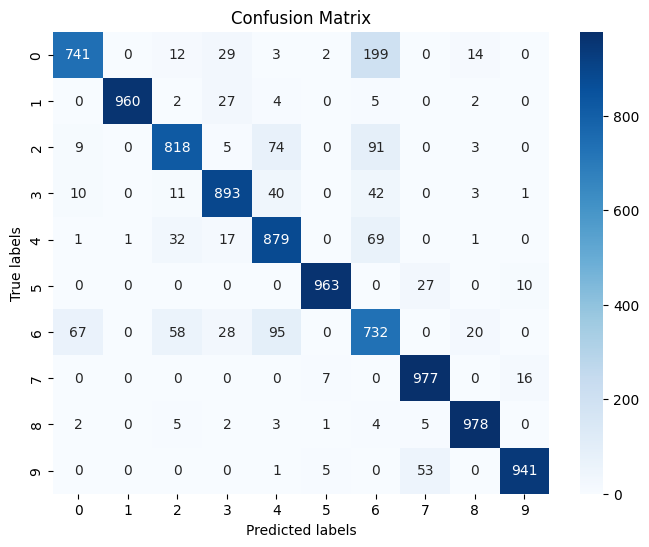

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have y_test and y_pred

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(cm.shape[1]), yticklabels=range(cm.shape[0]))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ***margin_sampling:***

prepare data

In [19]:
#labeled data
initial_idx = slice(2000)
X_initial_2 = X_train[initial_idx]
y_initial_2 = y_train[initial_idx]


#unlabeled data
X_pool_2 = np.delete(X_train, initial_idx, axis=0)
y_pool_2 = np.delete(y_train, initial_idx, axis=0)

In [20]:
learner = ActiveLearner(
    estimator=create_model(),
    query_strategy = margin_sampling,
    X_training=X_initial_2,
    y_training=y_initial_2
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,170,602 (8.28 MB)

 Trainable params: 2,169,194 (8.27 MB)

 Non-trainable params: 1,408 (5.50 KB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.6003 - loss: 1.5106


1813/1813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.7762 - loss: 0.6908
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8047 - loss: 0.5939
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8278 - loss: 0.5010
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8326 - loss: 0.4664
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8092 - loss: 0.5294
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8030 - loss: 0.5317
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1625/1625 ━━━━━━

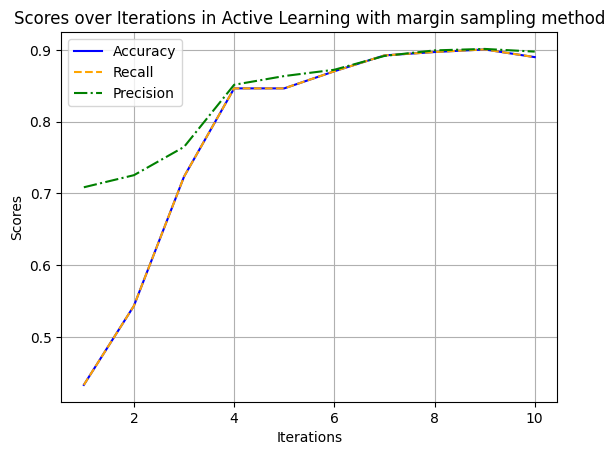

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

accuracies = [] 
recalls  = []
precisions = []
# Active learning loop
n_queries = 10
# Active learning loop
for _ in range(n_queries):
    query_idx, query_instance = learner.query(X_pool_2, n_instances=1000)
    X_query, y_query = X_pool_2[query_idx], y_pool_2[query_idx]

    
    learner.teach(X=X_query, y=y_query)
    
    X_pool_2 = np.delete(X_pool_2, query_idx, axis=0)
    y_pool_2 = np.delete(y_pool_2, query_idx, axis=0)
    print(len(X_query))
    y_pred = learner.predict(X_test)
    
    acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

    accuracies.append(acc)
    recalls.append(recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted' , zero_division=1))
    precisions.append(precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted' , zero_division=1))
    
    # Evaluate the model periodically
    if (_ + 1) % 10 == 0:
        print(f"Query {_+1}, Accuracy: {acc}")
        
plt.plot(range(1, n_queries + 1), accuracies, label='Accuracy', linestyle='-', color='blue')
plt.plot(range(1, n_queries + 1), recalls, label='Recall', linestyle='--', color='orange')
plt.plot(range(1, n_queries + 1), precisions, label='Precision', linestyle='-.', color='green')
plt.xlabel('Iterations')
plt.ylabel('Scores')
plt.title('Scores over Iterations in Active Learning with margin sampling method')
plt.legend()
plt.grid(True)

plt.show()

In [22]:
y_pred = learner.predict(X_test)
acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(f"Accuracy: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8898


In [23]:
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.8974553059171135
Recall: 0.8898
F1-score: 0.8905442159961462


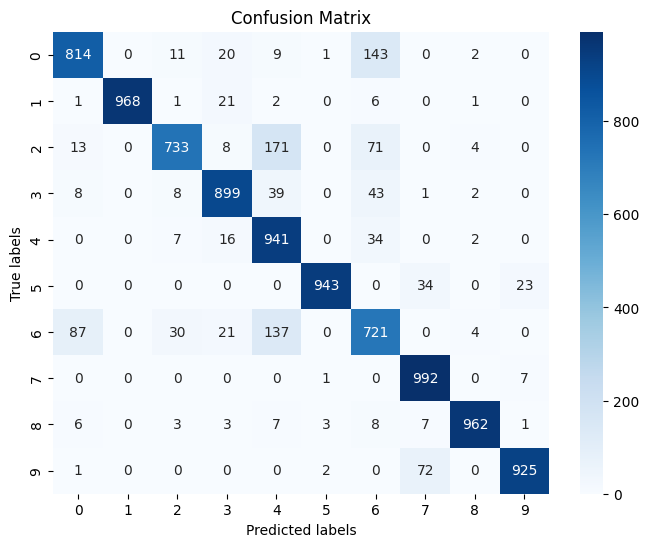

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have y_test and y_pred

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(cm.shape[1]), yticklabels=range(cm.shape[0]))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ***entropy_sampling:***

prepare data

In [28]:
#labeled data
initial_idx = slice(2000)
X_initial_3 = X_train[initial_idx]
y_initial_3 = y_train[initial_idx]


#unlabeled data
X_pool_3 = np.delete(X_train, initial_idx, axis=0)
y_pool_3 = np.delete(y_train, initial_idx, axis=0)

In [29]:
learner = ActiveLearner(
    estimator=create_model(),
    query_strategy = entropy_sampling,
    X_training=X_initial_3,
    y_training=y_initial_3
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,170,602 (8.28 MB)

 Trainable params: 2,169,194 (8.27 MB)

 Non-trainable params: 1,408 (5.50 KB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.5882 - loss: 1.5216


1813/1813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8166 - loss: 0.5975
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8822 - loss: 0.3412
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.8914 - loss: 0.3567
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8520 - loss: 0.4350
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8201 - loss: 0.5140
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8046 - loss: 0.5438
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1625/1625 ━━━━━━

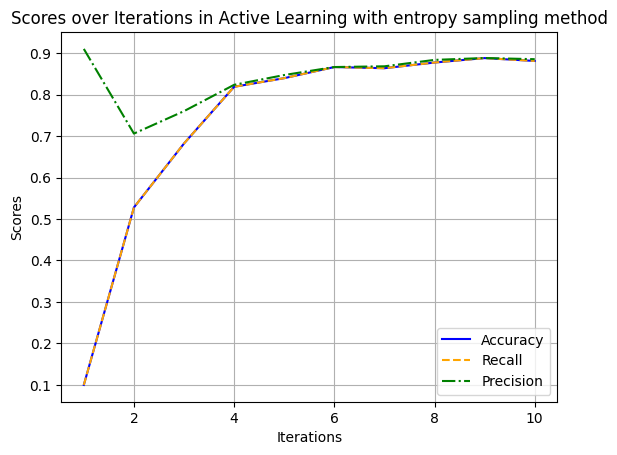

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

accuracies = [] 
recalls  = []
precisions = []
# Active learning loop
n_queries = 10
# Active learning loop
for _ in range(n_queries):
    query_idx, query_instance = learner.query(X_pool_3, n_instances=1000)
    X_query, y_query = X_pool_3[query_idx], y_pool_3[query_idx]

    
    learner.teach(X=X_query, y=y_query)
    
    X_pool_3 = np.delete(X_pool_3, query_idx, axis=0)
    y_pool_3 = np.delete(y_pool_3, query_idx, axis=0)
    print(len(X_query))
    y_pred = learner.predict(X_test)
    
    acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

    accuracies.append(acc)
    recalls.append(recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted' , zero_division=1))
    precisions.append(precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted' , zero_division=1))
    
    # Evaluate the model periodically
    if (_ + 1) % 10 == 0:
        print(f"Query {_+1}, Accuracy: {acc}")
        
plt.plot(range(1, n_queries + 1), accuracies, label='Accuracy', linestyle='-', color='blue')
plt.plot(range(1, n_queries + 1), recalls, label='Recall', linestyle='--', color='orange')
plt.plot(range(1, n_queries + 1), precisions, label='Precision', linestyle='-.', color='green')
plt.xlabel('Iterations')
plt.ylabel('Scores')
plt.title('Scores over Iterations in Active Learning with entropy sampling method')
plt.legend()
plt.grid(True)

plt.show()

In [31]:
y_pred = learner.predict(X_test)
acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(f"Accuracy: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.881


In [32]:
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.8852474923928443
Recall: 0.881
F1-score: 0.8793202222034288


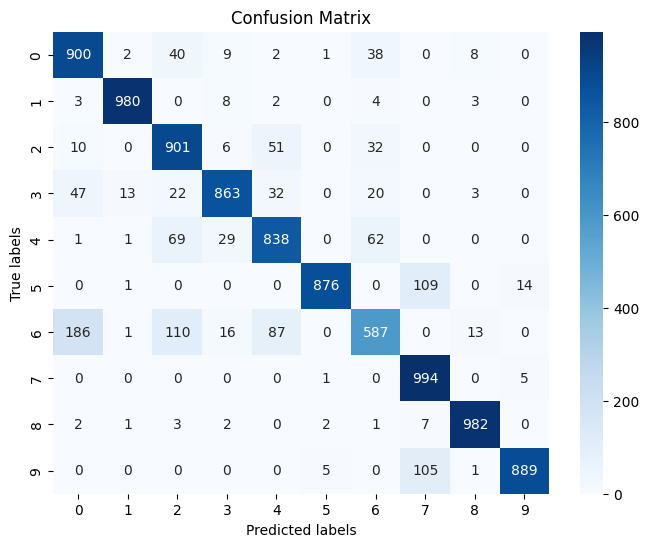

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have y_test and y_pred

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(cm.shape[1]), yticklabels=range(cm.shape[0]))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ***uncertainty_sampling (Least Confidence Sampling):***

prepare data

In [34]:
#labeled data
initial_idx = slice(2000)
X_initial_4 = X_train[initial_idx]
y_initial_4 = y_train[initial_idx]


#unlabeled data
X_pool_4 = np.delete(X_train, initial_idx, axis=0)
y_pool_4 = np.delete(y_train, initial_idx, axis=0)

In [35]:
from modAL.disagreement import vote_entropy_sampling

learner = ActiveLearner(
    estimator=create_model(),
    query_strategy = uncertainty_sampling,
    X_training=X_initial_4,
    y_training=y_initial_4
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,170,602 (8.28 MB)

 Trainable params: 2,169,194 (8.27 MB)

 Non-trainable params: 1,408 (5.50 KB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.5583 - loss: 1.6208


1813/1813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.8187 - loss: 0.5823
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8475 - loss: 0.4831
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.8804 - loss: 0.3324
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8504 - loss: 0.4449
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8147 - loss: 0.5202
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7964 - loss: 0.5463
1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1625/1625 ━━━━━━

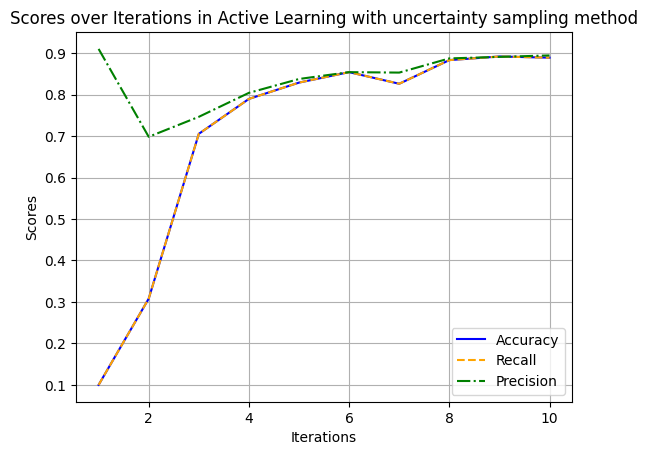

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

accuracies = [] 
recalls  = []
precisions = []
# Active learning loop
n_queries = 10
# Active learning loop
for _ in range(n_queries):
    query_idx, query_instance = learner.query(X_pool_4, n_instances=1000)
    X_query, y_query = X_pool_4[query_idx], y_pool_4[query_idx]

    
    learner.teach(X=X_query, y=y_query)
    
    X_pool_4 = np.delete(X_pool_4, query_idx, axis=0)
    y_pool_4 = np.delete(y_pool_4, query_idx, axis=0)
    print(len(X_query))
    y_pred = learner.predict(X_test)
    
    acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

    accuracies.append(acc)
    recalls.append(recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted' ,zero_division=1))
    precisions.append(precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted' , zero_division=1))
    
    # Evaluate the model periodically
    if (_ + 1) % 10 == 0:
        print(f"Query {_+1}, Accuracy: {acc}")
        
plt.plot(range(1, n_queries + 1), accuracies, label='Accuracy', linestyle='-', color='blue')
plt.plot(range(1, n_queries + 1), recalls, label='Recall', linestyle='--', color='orange')
plt.plot(range(1, n_queries + 1), precisions, label='Precision', linestyle='-.', color='green')
plt.xlabel('Iterations')
plt.ylabel('Scores')
plt.title('Scores over Iterations in Active Learning with uncertainty sampling method')
plt.legend()
plt.grid(True)

plt.show()

In [37]:
y_pred = learner.predict(X_test)
acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(f"Accuracy: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8889


In [38]:
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.8943233658991981
Recall: 0.8889
F1-score: 0.8895257053732551


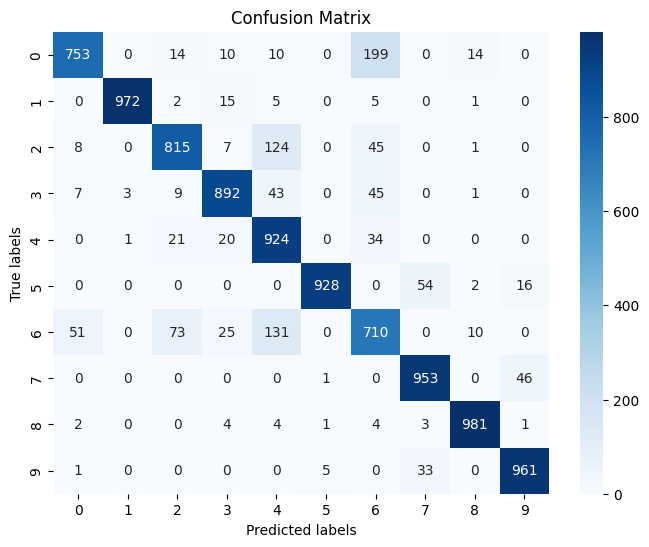

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have y_test and y_pred

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(cm.shape[1]), yticklabels=range(cm.shape[0]))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ***passive learning: ***

In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

reg=None
num_filters=32
ac='relu'
adm = Adam(learning_rate=0.001, decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0

model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(32, 32, 3),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation=ac,kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [42]:
# Train the model
history = model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.4397 - loss: 1.7661
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6865 - loss: 0.8937
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7553 - loss: 0.7063
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7970 - loss: 0.5872
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8312 - loss: 0.4946
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8513 - loss: 0.4289
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8722 - loss: 0.3622
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8954 - loss: 0.3028
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9124 - loss: 0.2548
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9204 - loss: 0.2213


In [43]:
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 2s - 7ms/step - accuracy: 0.8151 - loss: 0.6477
Test accuracy: 0.8151000142097473


In [44]:
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.09905925034848333
Recall: 0.099
F1-score: 0.09878320317431467


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


<Figure size 800x800 with 0 Axes>

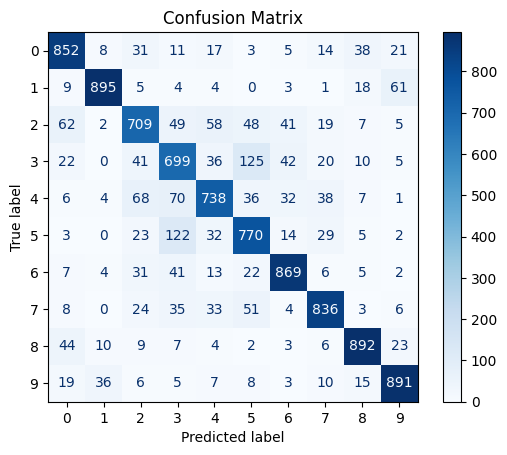

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
